# US Housing Price Regression

Name: Tan Wen Tao Bryan <br>
Admin No: P2214449 <br>
Class: DAAA/FT/2A/01<br>

-------------------------------------------------------------------------------------------------------------------------------

# Project Objective

- To build a regression model to predict the housing price in US based on a few various factors such as city, house area, No. of bedrooms and toilets, renovation status, etc.

# Index
1.  Exploratory Data Analysis<br>
    1.1 Data Exploration<br>
    1.2 Data Visualisation<br>
2.  Data Cleaning/Feature Engineering<br>
3.  Model Selection<br>
4.  Model Evaluation<br>
5.  Model Improvement<br>
6.  Summary

# References
1. Gomez, J., 2022. 8 critical factors that influence a home’s value. [online]. Opendoor. 
Available at: https://www.opendoor.com/articles/factors-that-influence-home-value [Accessed at 4 Jun 2022].
2. sklearn. Plotting Learning Curves and Checking Models'Scalability. [online]. Available at https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 [Accessed at 9 Jun 2023]
3. Classical ML Equations in LaTeX.[online] GitHub. https://blmoistawinde.github.io/ml_equations_latex/ [Accessed at 9 Jun 2023].
4. Shin, T., 2023. Understanding Feature Importance and How to Implement it in Python. [online]. Medium. Available from: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 [Accessed at 9 Jun 2023]
5. Yellowbrick., 2019. Prediction Error Plot. [online]. Available from: https://www.scikit-yb.org/en/latest/api/regressor/peplot.html#:~:text=A%20prediction%20error%20plot%20shows,variance%20is%20in%20the%20model.[Accessed at 9 Jun 2023].
6. Interpreting Residual Plots to Improve Your Regression. [online]. Available from: https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/ [Accessed at 9 Jun 2023]

sklearn links:
1. https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Background Info
- In the US, there are a few factors that affect the housing prices.
- Factors include:
    - Location (due to proximity of houses to entertainment facilities, public transport)
    - Size of the Property (Area psm, No. of Rooms/Toilets, Stories)
    - Upgrades & Updates (Furnished status improve home value)
    - Local Market (No of Other Properties in the Area, Number of Buyers in the Market
    - Economic & Political Status of the Area (Affects supply & demand)
    - Age of the house

# Importing Libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

#IMBlearn libraries
from imblearn.pipeline import Pipeline

#sklearn model evaluation
from sklearn.model_selection import(
    cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, learning_curve
)
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

#sklearn classification models
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

#Pickle library - Saving Models
import pickle

# Importing Dataset

In [2]:
#import credit_dataset csv file as a dataframe
housing_df = pd.read_csv('./ST1511_AIML_CA1_datasets/housing_dataset.csv', sep=",")
display(housing_df)

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


# 1.1) Data Exploration

Explore the nature of the dataset can help us gain a better understanding of the characteristics of the dataset

This is a dataset collected from a property agent, it contains 545 data points with 8 columns.

- House ID: Unique house identifier ranging from 0 to 544
- City: Which city the house is located
- House Area: Size of the house in square meters
- No. of Bedrooms: How many bedrooms in the house
- No. of Toilets: How many toilets in the house
- Stories: The number of stories in the house
- Renovation Status: How well the house is renovated
- Price: The price of the house in US dollars


### Descriptive Statistics

In [3]:
#Make a copy to prevent mutation
housing_ds = housing_df.copy()

#Shape of dataset
print(housing_ds.shape)

(545, 8)


In [4]:
print(housing_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB
None


<b>Observations:</b><br>
    - 545 rows and 8 columns<br>
    - 2 categorical columns, 5 numerical columns<br>
    - All columns has an equal number of observations and no null values<br>
    - House ID has a unique value for every row so it can be removed later <br>
    - Price ($) is the target variable as it fulfils the project objective

### Unique Values for Columns with Categorical Data

In [5]:
#cols with categorical data
categorical_col = housing_ds.dtypes[housing_ds.dtypes=='object']
print(categorical_col)
print()

#prints unique categorical values
for cat_val in categorical_col.index:
    print(f'{cat_val} - {housing_ds[cat_val].unique()}')

City                 object
Renovation Status    object
dtype: object

City - ['Chicago' 'Denver' 'Seattle' 'New York' 'Boston']
Renovation Status - ['furnished' 'semi-furnished' 'unfurnished']


<b>Observations:</b><br>
    - Have to encode these categorical data later in feature engineering<br>

### Missing Values

In [6]:
#check for missing values in the dataframe
print(housing_ds.isna().sum().sort_values())

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64


<b>Observations:</b><br>
    - No missing values for the dataset so there is no need for imputation

### Data Information

In [7]:
#Descriptive Stats
housing_stats=housing_ds.describe(include="all").T
housing_stats["percentage of most freq val"] = housing_stats["freq"]/len(housing_ds)*100
display(housing_stats)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,percentage of most freq val
House ID,545.0,NaN,NaN,NaN,272.0,157.47222,0.0,136.0,272.0,408.0,544.0,NaN
City,545,5,New York,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.990826
House Area (sqm),545.0,NaN,NaN,NaN,515.054128,217.014102,165.0,360.0,460.0,636.0,1620.0,NaN
No. of Bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0,NaN
No. of Toilets,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0,NaN
Stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0,NaN
Renovation Status,545,3,semi-furnished,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.651376
Price ($),545.0,NaN,NaN,NaN,476672.924771,187043.961566,175000.0,343000.0,434000.0,574000.0,1330000.0,NaN


<b>Observations:</b><br>
    - Dataset has the most amount of houses in New York, about 29% of the dataset<br>
    - Dataset has the most amount of semi-furnished houses, about 41.2% of the dataset<br>

### Target Variable

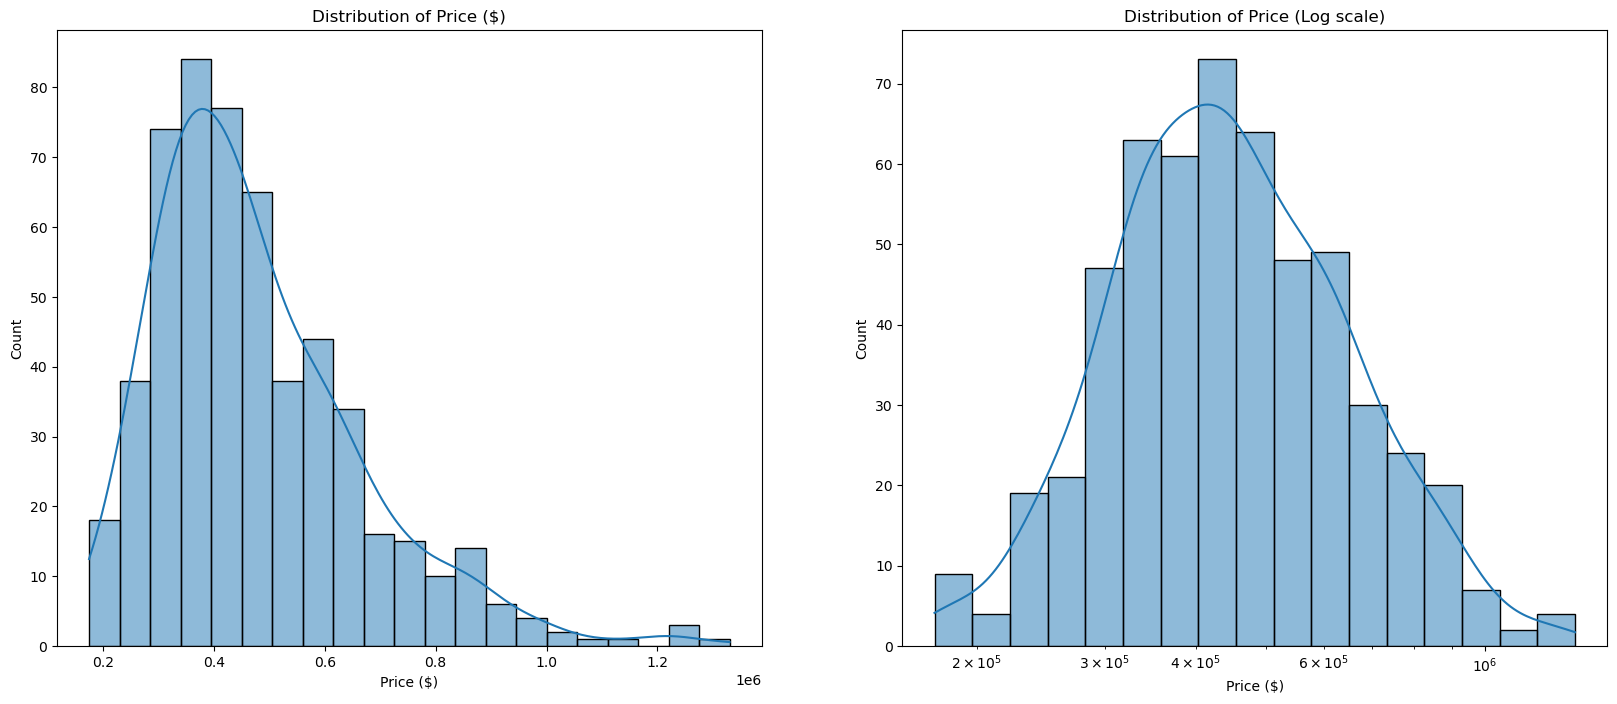

In [8]:
#plot a histograph to show distribution of target variable (price)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(data=housing_ds, x="Price ($)", kde=True, ax=ax[0])
ax[0].set_title("Distribution of Price ($)")
sns.histplot(data=housing_ds, x="Price ($)", kde=True, log_scale=True, ax=ax[1])
ax[1].set_title("Distribution of Price (Log scale)")
plt.show()

<b>Observations:</b><br>
    - Histogram shows that the distribution of housing prices in the US is positively skewed, mostly costing between $`300 000 & `$400 000 <br>
    - Using a log transformation will deskew the data, making it normalised <br>
    - Shows that US housing prices follow a log normal distribution

# 1.2) Data Visualisation
-  Part of Data Exploration

### <u>Continuous Variables (Distribution)</u>

- Check Distibution of House Area

#### House Area (sqm)

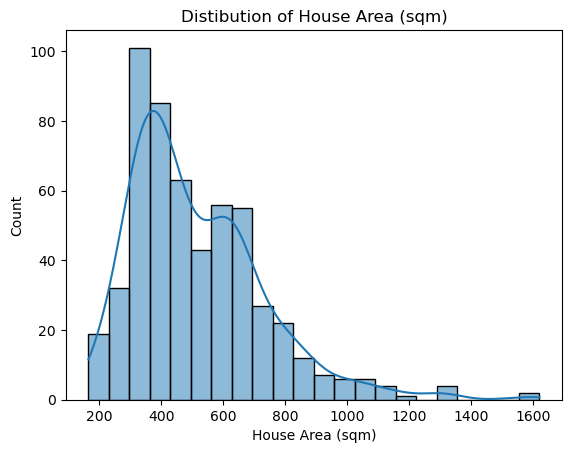

In [9]:
#House Area Distribution
sns.histplot(data=housing_ds, x="House Area (sqm)", kde=True)
plt.title("Distibution of House Area (sqm)")
plt.show()

<b>Observations:</b><br>
    - Distribution is skewed to the left, higly densed around 300-400sqm <br>
    - Outliers of houses with around 1300 and 1600 sqm exists

### <u>Discrete Variables (Distribution)</u>

- Check price of US houses against the number of bedrooms, toilets and stories

#### Number of Bedrooms

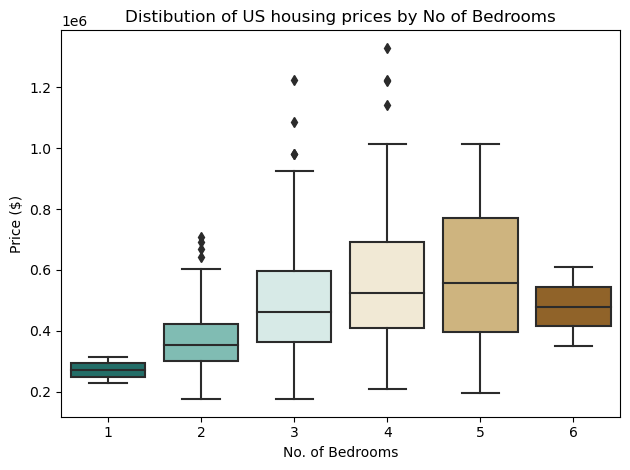

In [10]:
# Distribution of Houses Prices by No. Of Bedrooms
sns.boxplot(data=housing_ds, x="No. of Bedrooms", y="Price ($)", palette='BrBG_r')
plt.title("Distibution of US housing prices by No of Bedrooms")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - Generally, the greater the number of bedrooms, the greater the price of the houses in US <br>
    - An exception would be a 6-room house in the US is cheaper than a 4-room house <br>
    - Prices of a 6-room house is also more consistent than 3-5 room house <br>
    - Distribution is quite symmetrical for all variables

#### Number of Toilets

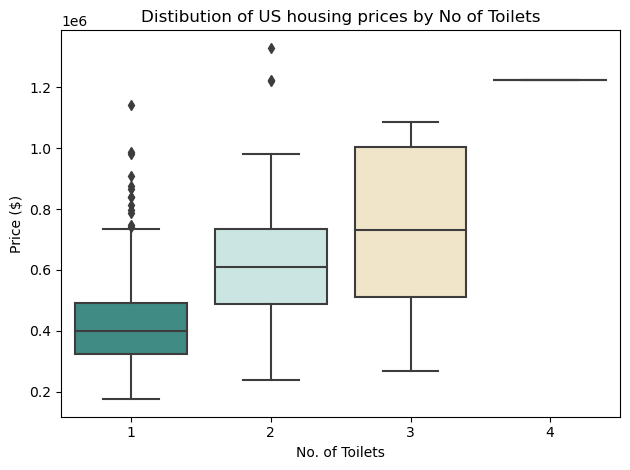

In [11]:
# Distribution of Houses Prices by No. Of Toilets
sns.boxplot(data=housing_ds, x="No. of Toilets", y="Price ($)", palette='BrBG_r')
plt.title("Distibution of US housing prices by No of Toilets")
plt.tight_layout()
plt.show()

In [12]:
#cols with categorical data
Toilets4 = housing_ds[housing_ds['No. of Toilets']==4]
display(Toilets4)
print(len(Toilets4))

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
1,1,Denver,896.0,4,4,4,furnished,1225000


1


<b>Observations:</b><br>
    - Generally, the greater the number of toilets, the greater the price of houses in US <br>
    - There is only 1 house in the dataset with 4 toilets hence the IQR of houses with 4 toilets is constant <br>
    - Distribution is quite symmetrical in general.

#### Number of Stories

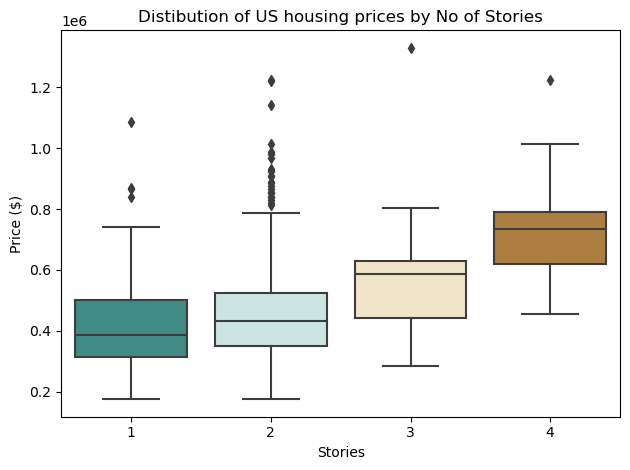

In [13]:
# Distribution of Houses Prices by No. Of Stories
sns.boxplot(data=housing_ds, x="Stories", y="Price ($)", palette='BrBG_r')
plt.title("Distibution of US housing prices by No of Stories")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - Generally, the greater the number of stories, the greater the price of houses in US <br>
    - Distribution is quite symmetrical in general.

### <u>Bivariate Analysis</u>

- Check relationship between variables

C:\Users\bryan\AppData\Local\Temp\ipykernel_29388\422641813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_ds.corr(), annot=True)


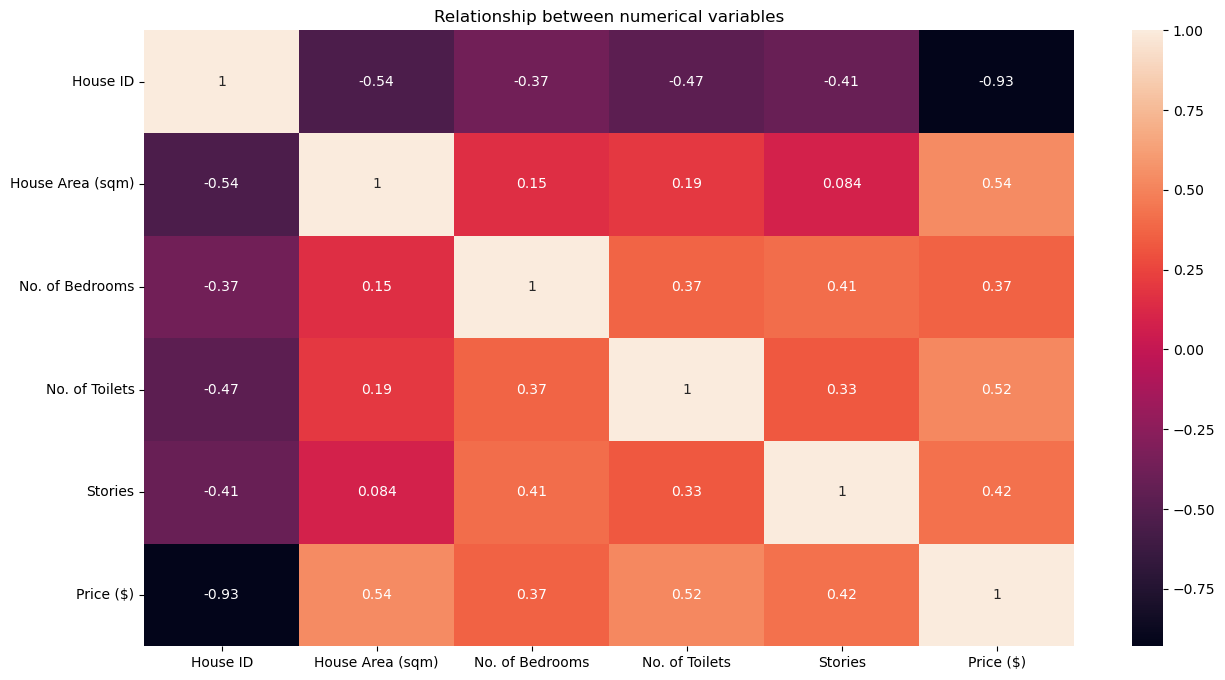

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_ds.corr(), annot=True)
plt.title("Relationship between numerical variables")
plt.show()

<b>Observations:</b><br>
    - Positive moderate linear relationship between House Area & Price of houses in US

### <u>Categorical Variables (Distribution)</u>
- Check prices of US houses agianst different categories

#### Cities

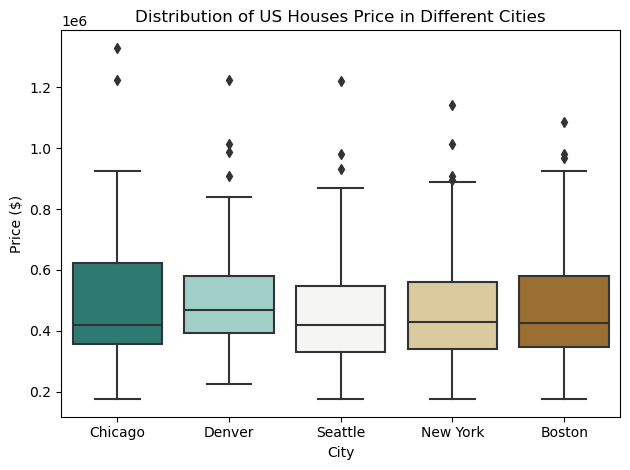

In [15]:
# Distribution of US Houses in Different Cities
sns.boxplot(data=housing_ds, x="City", y="Price ($)", palette='BrBG_r')
plt.title("Distribution of US Houses Price in Different Cities")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - Houses in Denver seems to be the most expensive among the other cities.<br>
    - Houses in other cities are quite similar in price.

#### Renovation Status

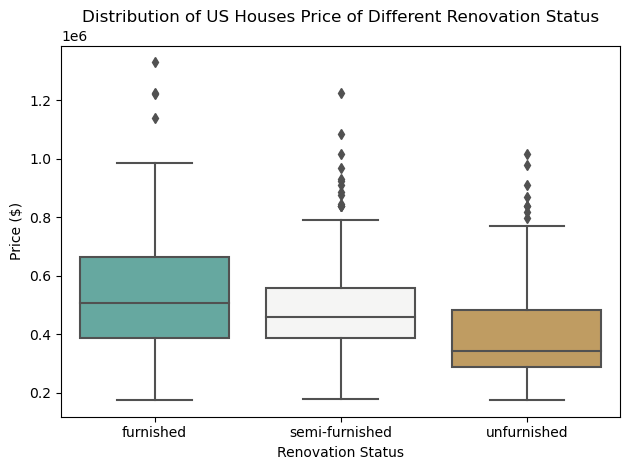

In [16]:
# Distribution of US Houses Price of Different Renovation Status
sns.boxplot(data=housing_ds, x="Renovation Status", y="Price ($)", palette='BrBG_r')
plt.title("Distribution of US Houses Price of Different Renovation Status")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - Furnished houses are the most expensive, followed by semi-furnished then unfurnished. <br>
    - Semi-furnished houses are the most consistent in the prices sold.

# 2) Data Cleaning/Feature Engineering

### <u>Drop Unwanted Columns</u>
- Drop House ID as it is unique for every row

In [17]:
housing_df.drop("House ID", axis=1, inplace=True)
display(housing_df.head())

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000


### <u>Separate Features & Target labels</u>

In [18]:
X, y = housing_df.drop("Price ($)", axis=1), housing_df["Price ($)"]

### <u>Split Testing & Training data</u>
- Split data 80/20 training/testing data to train and test the model

In [19]:
#Split test and training data for features and target label
#random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)

(436, 6)
(109, 6)


### <u>Feature Transformation</u>

#### Price (Target)
- From the histogram, we can see that the distribution of house price in US is positively skewed.
- To make the target variable a normal distribution, we shall apply logarithm scale onto the target variable by using np.log1p
- Need to add 1 to X because if X=0, there will be no value

    $$ new X = log(1+X) $$

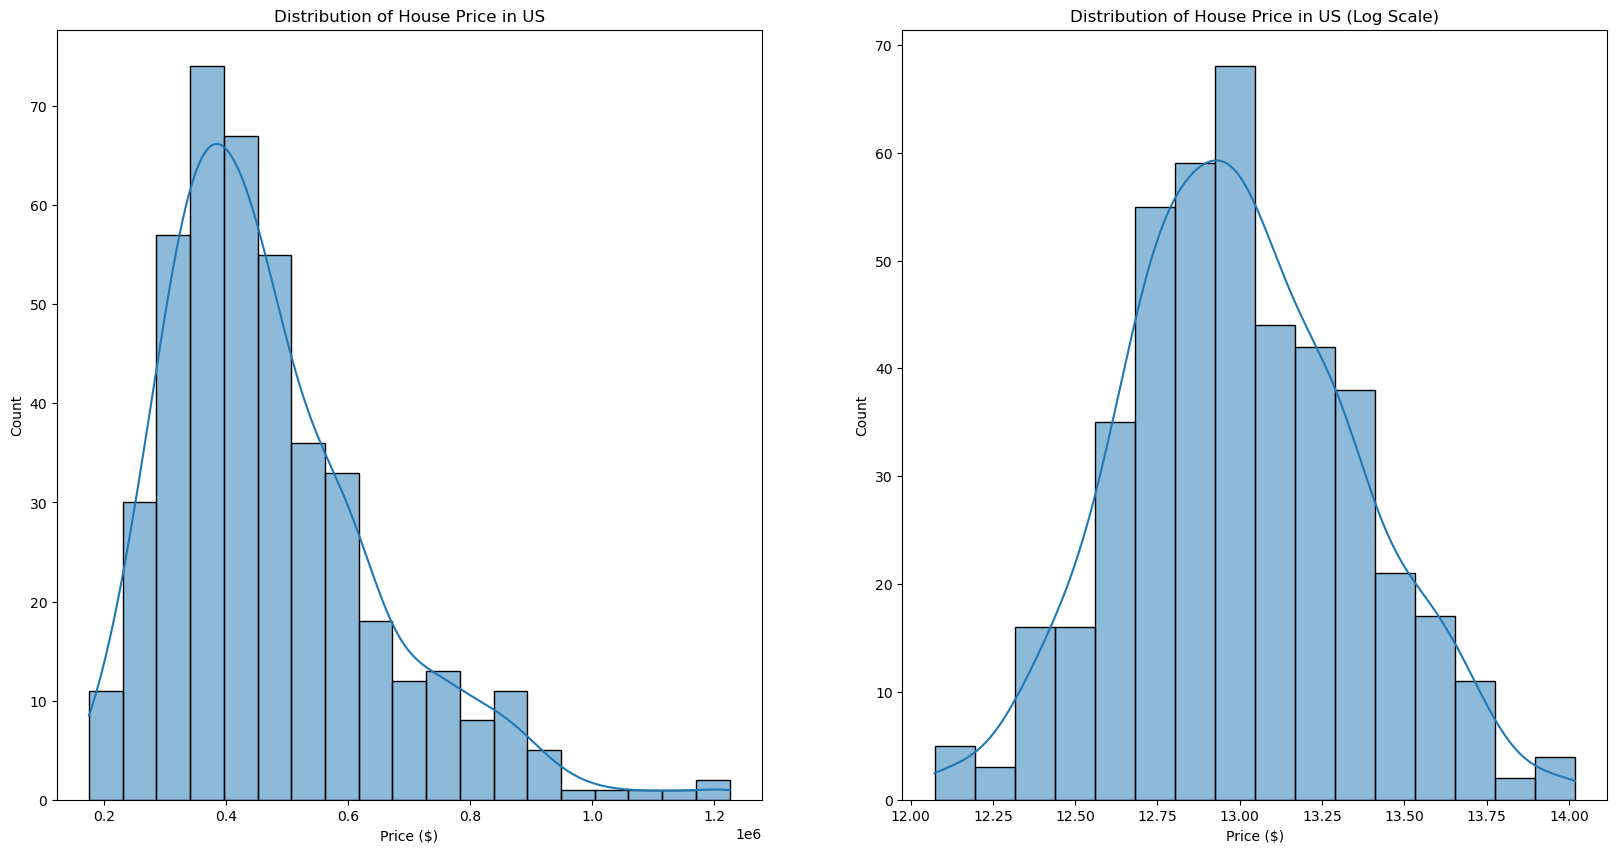

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.histplot(y_train, kde=True, ax=ax[0])
ax[0].set_title("Distribution of House Price in US")
sns.histplot(y_train.apply(np.log1p), kde=True, ax=ax[1])
ax[1].set_title("Distribution of House Price in US (Log Scale)")
plt.show()

#### House Area
- Apply logscale to House Area too

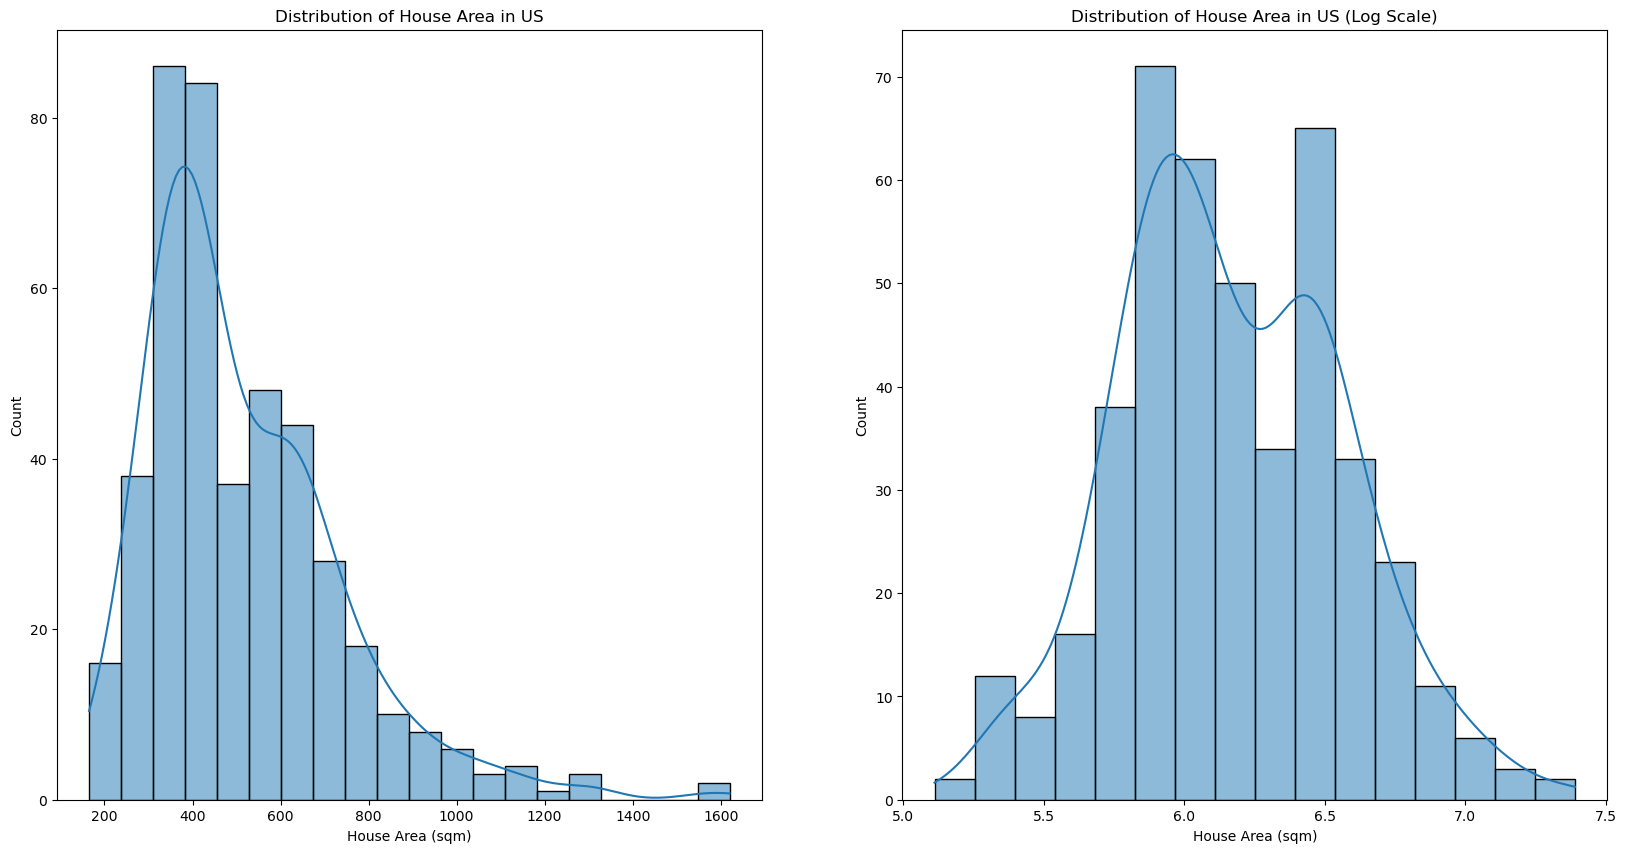

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.histplot(X_train["House Area (sqm)"], kde=True, ax=ax[0])
ax[0].set_title("Distribution of House Area in US")
sns.histplot(X_train["House Area (sqm)"].apply(np.log1p), kde=True, ax=ax[1])
ax[1].set_title("Distribution of House Area in US (Log Scale)")
plt.show()

### <u>Feature Engineering</u>
- Engineer new features to train the model to explain new patterns

#### Base Area
- Shows the 2D area of the house
    $$ Base Area = \frac{House Area}{No. Of Stories} $$

In [22]:
housing_ds["House Base Area"] = housing_ds["House Area (sqm)"]/housing_ds["Stories"]
display(housing_ds.head())

X_trainSubset = X_train.copy()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),House Base Area
0,0,Chicago,742.0,4,2,3,furnished,1330000,247.333333
1,1,Denver,896.0,4,4,4,furnished,1225000,224.000000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000,498.000000
3,3,Seattle,750.0,4,2,2,furnished,1221500,375.000000
4,4,New York,742.0,4,1,2,furnished,1141000,371.000000


#### Area per Toilet/Area per Bedroom
- Tried new different features but it made the scores worse
        $$ {AreaPerToilet} = \frac{House Area}{No. Of Toilets} $$
        
        $$ {AreaPerBedroom} = \frac{House Area}{No. Of Bedrooms} $$

In [23]:
#     housing_ds["Area per Toilet"] = housing_ds["House Area (sqm)"]/housing_ds["No. of Toilets"]
#     housing_ds["Area per Bedroom"] = housing_ds["House Area (sqm)"]/housing_ds["No. of Bedrooms"]

### <u>Categorical Encoding</u>
- Needs to encode categorical data as numerical data so that the data can be processed by the model

#### One-Hot Encoding
- Used for City column
- Meant for nominal data

In [24]:
#Encode for City
enc1 = OneHotEncoder()
col=["City"]
enc1.fit(X_trainSubset[col])

X_trainSubset=pd.concat([
    X_trainSubset.drop(col, axis=1).reset_index(drop=True), 
    pd.DataFrame(
        enc1.transform(X_trainSubset[col]).toarray(),
        columns=enc1.get_feature_names_out()
    )
], axis=1)


display(X_trainSubset)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle
0,600.0,3,2,4,furnished,0.0,0.0,0.0,1.0,0.0
1,720.0,3,2,1,semi-furnished,0.0,0.0,1.0,0.0,0.0
2,381.6,2,1,1,furnished,0.0,1.0,0.0,0.0,0.0
3,261.0,3,1,2,unfurnished,1.0,0.0,0.0,0.0,0.0
4,375.0,3,1,2,unfurnished,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
431,600.0,4,2,4,unfurnished,1.0,0.0,0.0,0.0,0.0
432,545.0,4,2,1,semi-furnished,0.0,0.0,0.0,0.0,1.0
433,450.0,3,2,3,furnished,0.0,0.0,0.0,0.0,1.0
434,404.0,2,1,1,unfurnished,0.0,0.0,0.0,1.0,0.0


#### Ordinal Encoding
- Used for renovation status column
- Meant for ordinal data

In [25]:
#Encode for Renovation Status
enc2 = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[['unfurnished','semi-furnished','furnished']])
X_trainSubset[["Renovation Status"]] = enc2.fit_transform(X_trainSubset[["Renovation Status"]])
display(X_trainSubset)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle
0,600.0,3,2,4,2.0,0.0,0.0,0.0,1.0,0.0
1,720.0,3,2,1,1.0,0.0,0.0,1.0,0.0,0.0
2,381.6,2,1,1,2.0,0.0,1.0,0.0,0.0,0.0
3,261.0,3,1,2,0.0,1.0,0.0,0.0,0.0,0.0
4,375.0,3,1,2,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
431,600.0,4,2,4,0.0,1.0,0.0,0.0,0.0,0.0
432,545.0,4,2,1,1.0,0.0,0.0,0.0,0.0,1.0
433,450.0,3,2,3,2.0,0.0,0.0,0.0,0.0,1.0
434,404.0,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0


### <u>Standardization</u>
- Using StandardScaler to standardise the scale of the data so that the mean=0 and standard deviation=1 makes data consistent for model to use

In [26]:
num_cols = ['House Area (sqm)']
X_train_scaled = X_trainSubset.copy()
X_train_scaled[num_cols]=StandardScaler().fit_transform(X_train_scaled[num_cols])
X_train_scaled

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle
0,0.384168,3,2,4,2.0,0.0,0.0,0.0,1.0,0.0
1,0.929181,3,2,1,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.607755,2,1,1,2.0,0.0,1.0,0.0,0.0,0.0
3,-1.155492,3,1,2,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.637730,3,1,2,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
431,0.384168,4,2,4,0.0,1.0,0.0,0.0,0.0,0.0
432,0.134371,4,2,1,1.0,0.0,0.0,0.0,0.0,1.0
433,-0.297097,3,2,3,2.0,0.0,0.0,0.0,0.0,1.0
434,-0.506019,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0


### <u>Pipeline</u>
- To link the steps of data engineering and the model implementation together

In [27]:
#Feature Engineering
def feature_engineering(df):
    df=pd.DataFrame(df.reset_index(drop=True))
    df["House Base Area"] = df["House Area (sqm)"]/df["Stories"]
    return df

#Logscale
def apply_log(df):
    df["House Area (sqm)"]= np.log1p(df["House Area (sqm)"])
    return df

#Categorical transformer (OneHotEncode + OrdinalEncode)
categoricalTransformer = ColumnTransformer(
    [
        ('oneHotEnc', OneHotEncoder(categories='auto', sparse_output=False), ['City']),
        ('ordinalEnc', OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']]), ['Renovation Status'])
    ],
    remainder='passthrough'
)

#Numerical transformer
num_cols = ['House Area (sqm)', 'No. of Bedrooms','No. of Toilets','Stories','House Base Area']
numericalTransformer = ColumnTransformer([
    ("standardise", StandardScaler(), num_cols)
],
remainder="passthrough")

#Combining two transformers into preprocessor
preprocessor=ColumnTransformer([
    ("categorical", categoricalTransformer, ["City","Renovation Status"]),
    ("numerical", numericalTransformer, num_cols)
],
remainder="passthrough")

#Building the steps
steps = [
    ("featureEngineering", FunctionTransformer(feature_engineering)),
    ("logScale", FunctionTransformer(apply_log)),   
    ("preprocessing", preprocessor),
    ("model")
]

model_step=len(steps)-1

# 3) Model Selection

### <u>Dummy Baseline Model</u>
Using DummyRegressor as a benchmark to compare other models with

- Use of TransformedTargetRegressor to transform values of the target variable using a logarithm function to apply to y before passing to fit
- Inverse function of log to apply the prediction of the regressor to return to original training labels

In [28]:
#Add in DummyRegressor class
steps[model_step]=('model', TransformedTargetRegressor(regressor = DummyRegressor(), func=np.log1p, inverse_func=np.expm1))

dummy=Pipeline(steps=steps)
dummy.fit(X_train, y_train)

Pipeline(steps=[('featureEngineering',
                 FunctionTransformer(func=<function feature_engineering at 0x0000020B3B7A5D80>)),
                ('logScale',
                 FunctionTransformer(func=<function apply_log at 0x0000020B3B7A5E10>)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('oneHotEnc'...
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('standardise',
                                                                                   StandardScaler(),
                                                                                   ['House '
                                                                                    'Area '
                                                                                    '(sqm)',
                                                                                    'No. '
                                                                                    'of '
                                                                                    'Bedrooms',
                                                                                    'No. '
                                                                                    'of '
                                                                                    'Toilets',
                                                                                    'Stories',
                                                                                    'House '
                                                                                    'Base '
                                                                                    'Area'])]),
                                                  ['House Area (sqm)',
                                                   'No. of Bedrooms',
                                                   'No. of Toilets', 'Stories',
                                                   'House Base Area'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=DummyRegressor()))])

### <u>Model Selection</u>
Here are some reasons and benefits of why I have selected these models for regression.

<b><u>Linear Regression</u></b><br>
- Fits a line to the data set <br>
- Able to predict the price of the US housing by matching the equation of the line <br>
    
<b><u>AdaBoost Regressor</u></b><br>
- Ensemble learning method that combines multiple weak learners sequentially to create a strong predictive model<br>
- Uses a linear loss function for regression <br>
- Uses simple weak learners <br>
    
<b><u>Gradient Boosting Regressor</u></b><br>
- Ensemble learning method that combines multiple weak or base learners in a stage wise function where each learner is trained to minimise the errors of the previous model <br>
- Uses mean squarred error (MSE) function for regression <br>
- Uses more complex weak learners <br>

<b><u>Random Forest Regressor</u></b><br>
- Make use of bagging where the output of each decision tree averaged to make the final prediction <br>
- Can capture non linear relationships between input features and target feature <br>
- Reduces risk of overfitting <br>
- Robust to noisy data, irrelevant features <br>

<b><u>KNN</u></b><br>
- Uses the value of the nearest data points to find the closest data points in training set<br>
- Prediction for the test point is the average of the other data points <br>

<b><u>Decision Tree Regressor</u></b><br>
- Subdivide the feature space into regions of constant value<br>
- Average of the decision tree reduces risk of overfitting <br>

<b><u>Ridge</u></b><br>
- Adds "squared magnitude" of coefficient as penalty term to the loss function <br>
- If lambda is very large, it will add too much weight and result in underfitting

    $$ \hat{\beta}^{ridge} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right) $$
    
<b><u>Lasso</u></b><br>
- Adds absolute value of magnitude of coefficient as penalty term to the loss function<br>
- Lasso shrinks the less important feature coefficient to zero which will remove some feature

    $$ \hat{\beta}^{lasso} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right) $$
    
<b><u>SGD</u></b><br>
- Updates the parameters based on gradients from small subsets <br>
- Finds the optimal parameter that minimize the loss function and provide a good fit to the regression problem at hand

In [29]:
#Defining the models used with default hyperparameters
models = [("LinearRegression", LinearRegression()),
          ("AdaBoostRegressor", AdaBoostRegressor(random_state=42)),
          ("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42)),
          ("RandomForestRegressor", RandomForestRegressor(random_state=42)),
          ("KNeighborsRegressor", KNeighborsRegressor()),
          ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
          ("SGDRegressor", SGDRegressor(random_state=42)),
          ("Ridge", Ridge(random_state=42)),
          ("Lasso", Lasso(random_state=42))
]

# 4) Model Evaluation

##### As such, the evaluation metrics below are the ones that I have chosen to evaluate my models<br>
- Prioritise R2 & RMSE

<b><u>R2</u><b><br>
- Coefficient of Determination <br>
- Measures the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model
    
   $$ R^2 = 1 - \frac{{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $$

<b><u>RMSE</u><b><br>
- Square root of the mean of the square of all the error <br>
- RMSE is used more instead of MSE as MSE values are too big to compare with
    
   $$ RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}} $$
    
<b><u>MAE</u><b><br>
- Measures the average magnitude of errors in the regression model <br>
    
   $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| $$
    
<b><u>MAPE</u><b><br>
- Measures the average magnitude of errors in the regression model as a percentage <br>
- Measure of predicted accuracy
    
   $$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| \times 100 $$
    
<b><u>MSE</u><b><br>
- Measures the performance of regression models <br>
- By squaring the differences, MSE gives more weight to larger errors <br>
- The result is a non-negative value, with lower values indicating better model performance <br>
- Use the root squared version for a better way to measure
    
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [30]:
#Store scoring metrics
score_metrics=["r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error"]

### <u>Dummy Baseline Model</u>
- Evaluation metrics of dummy baseline (DummyRegressor)

In [31]:
print(f'Benchmark Accuracy Score : {dummy.score(X_train, y_train)}')
scores = cross_validate(dummy, X_train, y_train, cv=10, scoring=score_metrics)

#Retrieve the mean score of the Dummy Baseline Model
scores_df = pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean Score"))
display(scores_df)

Benchmark Accuracy Score : -0.027103635063244536


C:\Users\bryan\AppData\Local\Temp\ipykernel_29388\3032430496.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean Score"))


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.010706,0.007011,-0.033969,-154122.121417,-123527.663043,-0.351355,-2.375363e+10
1,0.009516,0.009532,-0.262430,-231291.961371,-169246.247219,-0.283551,-5.349597e+10
2,0.009519,0.006538,-0.151926,-215980.006953,-150689.241488,-0.278928,-4.664736e+10
3,0.010517,0.007540,-0.013184,-130256.959440,-102137.126195,-0.229797,-1.696688e+10
4,0.010823,0.006522,-0.023795,-124375.072243,-105398.699282,-0.273544,-1.546916e+10
5,0.012548,0.008520,-0.000190,-127577.075900,-107482.204337,-0.267293,-1.627591e+10
6,0.009553,0.009119,-0.084209,-205892.604176,-150929.669421,-0.291198,-4.239176e+10
7,0.009554,0.006157,-0.033742,-187620.065524,-135063.948391,-0.294903,-3.520129e+10
8,0.010513,0.006001,-0.030974,-209549.099752,-148461.320792,-0.322779,-4.391083e+10
9,0.009936,0.007074,-0.002622,-160163.445112,-126914.782888,-0.312196,-2.565233e+10


<b>Observations:</b><br>
    - All the r2 scores are negative which shows that the model does not follow the pattern of the data<br>
    - Model is severely underfitted as the negative mean absolute percentage error is -0.291

### <u>Models Selection</u>


In [32]:
#Function for the model
def evaluate_Model(X_train, y_train, models, scoring):
    avgModelScores=[]
    #Iterate through the models
    for name, model in models:
        steps[model_step]=('model', TransformedTargetRegressor(regressor = model, func=np.log1p, inverse_func=np.expm1))
        score=cross_validate(
            Pipeline(steps=steps),
            X_train,
            y_train,
            scoring=scoring,
            cv=10,
            return_train_score=True
        )
        avgModelScores.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(avgModelScores).sort_values(by=[
        "test_r2",
        "test_neg_root_mean_squared_error"
    ],ascending=False)

model_Scores=evaluate_Model(X_train, y_train, models, score_metrics)


In [33]:
model_Scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
GradientBoostingRegressor,0.083339,0.007754,0.517980,0.805744,-115497.781065,-77327.579417,-84144.271129,-55103.598048,-0.183656,-0.119682,-1.365322e+10,-5.982472e+09
RandomForestRegressor,0.223540,0.016171,0.500021,0.922731,-118136.675578,-48762.148608,-86033.378007,-33164.711079,-0.189635,-0.070491,-1.439805e+10,-2.378596e+09
Ridge,0.013146,0.008139,0.495915,0.567285,-118042.812982,-115437.768785,-86150.031509,-83190.700275,-0.185462,-0.178944,-1.429723e+10,-1.333016e+10
LinearRegression,0.016104,0.008128,0.495148,0.567126,-118113.848542,-115459.018218,-86203.598525,-83212.392481,-0.185548,-0.178954,-1.431112e+10,-1.333507e+10
AdaBoostRegressor,0.079144,0.012379,0.484865,0.635308,-120290.931428,-105961.616144,-87366.869009,-80252.831234,-0.188680,-0.171866,-1.493013e+10,-1.123079e+10
KNeighborsRegressor,0.010813,0.007066,0.472768,0.641031,-120590.431710,-105126.490673,-88480.925476,-73318.923542,-0.193380,-0.156695,-1.488876e+10,-1.105602e+10
SGDRegressor,0.013023,0.007975,0.433743,0.524785,-123927.582172,-120971.279636,-91365.195979,-87941.442120,-0.191855,-0.185074,-1.569472e+10,-1.463943e+10
DecisionTreeRegressor,0.011624,0.007008,0.052536,0.998573,-157715.224408,-6575.846630,-113736.333369,-976.094602,-0.252133,-0.002752,-2.530247e+10,-4.386882e+07
Lasso,0.012821,0.006698,-0.063704,-0.027097,-174682.841189,-177875.427506,-131985.090306,-131254.930883,-0.290555,-0.288868,-3.197651e+10,-3.165333e+10


<b>Observations:</b><br>
   - Due to insufficient data, the r2 score of all the models are not higher than 0.56 which shows that the relationship of the data fitted to the model is only moderate. <br>
   - Top best 3 models based on test r2 score and negative root mean squared error are GradientBoostingRegressor, RandomForestRegressor & Ridge.<br>
   - Lasso did not do as well as it might have removed some features altogether<br>
   - For Decision Tree, the data overfits the model as the train r2 score of 0.99 can drop to 0.02 in the train r2 score

### <u>Learning Curve</u>
- Shows relationship of a learner's performance and number of attempts on a task

In [34]:
def plot_learning_curve(model, X, y, scoring, cv=StratifiedKFold(shuffle=True, random_state=42),
                        train_sizes=np.linspace(0.1, 1.0, 10),ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes,
        return_times=True, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    #Plotting the curves (Training scores & CV scores)
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    ax.legend(loc="best")
    ax.set(ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01))
    
    #Get the name of the models
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

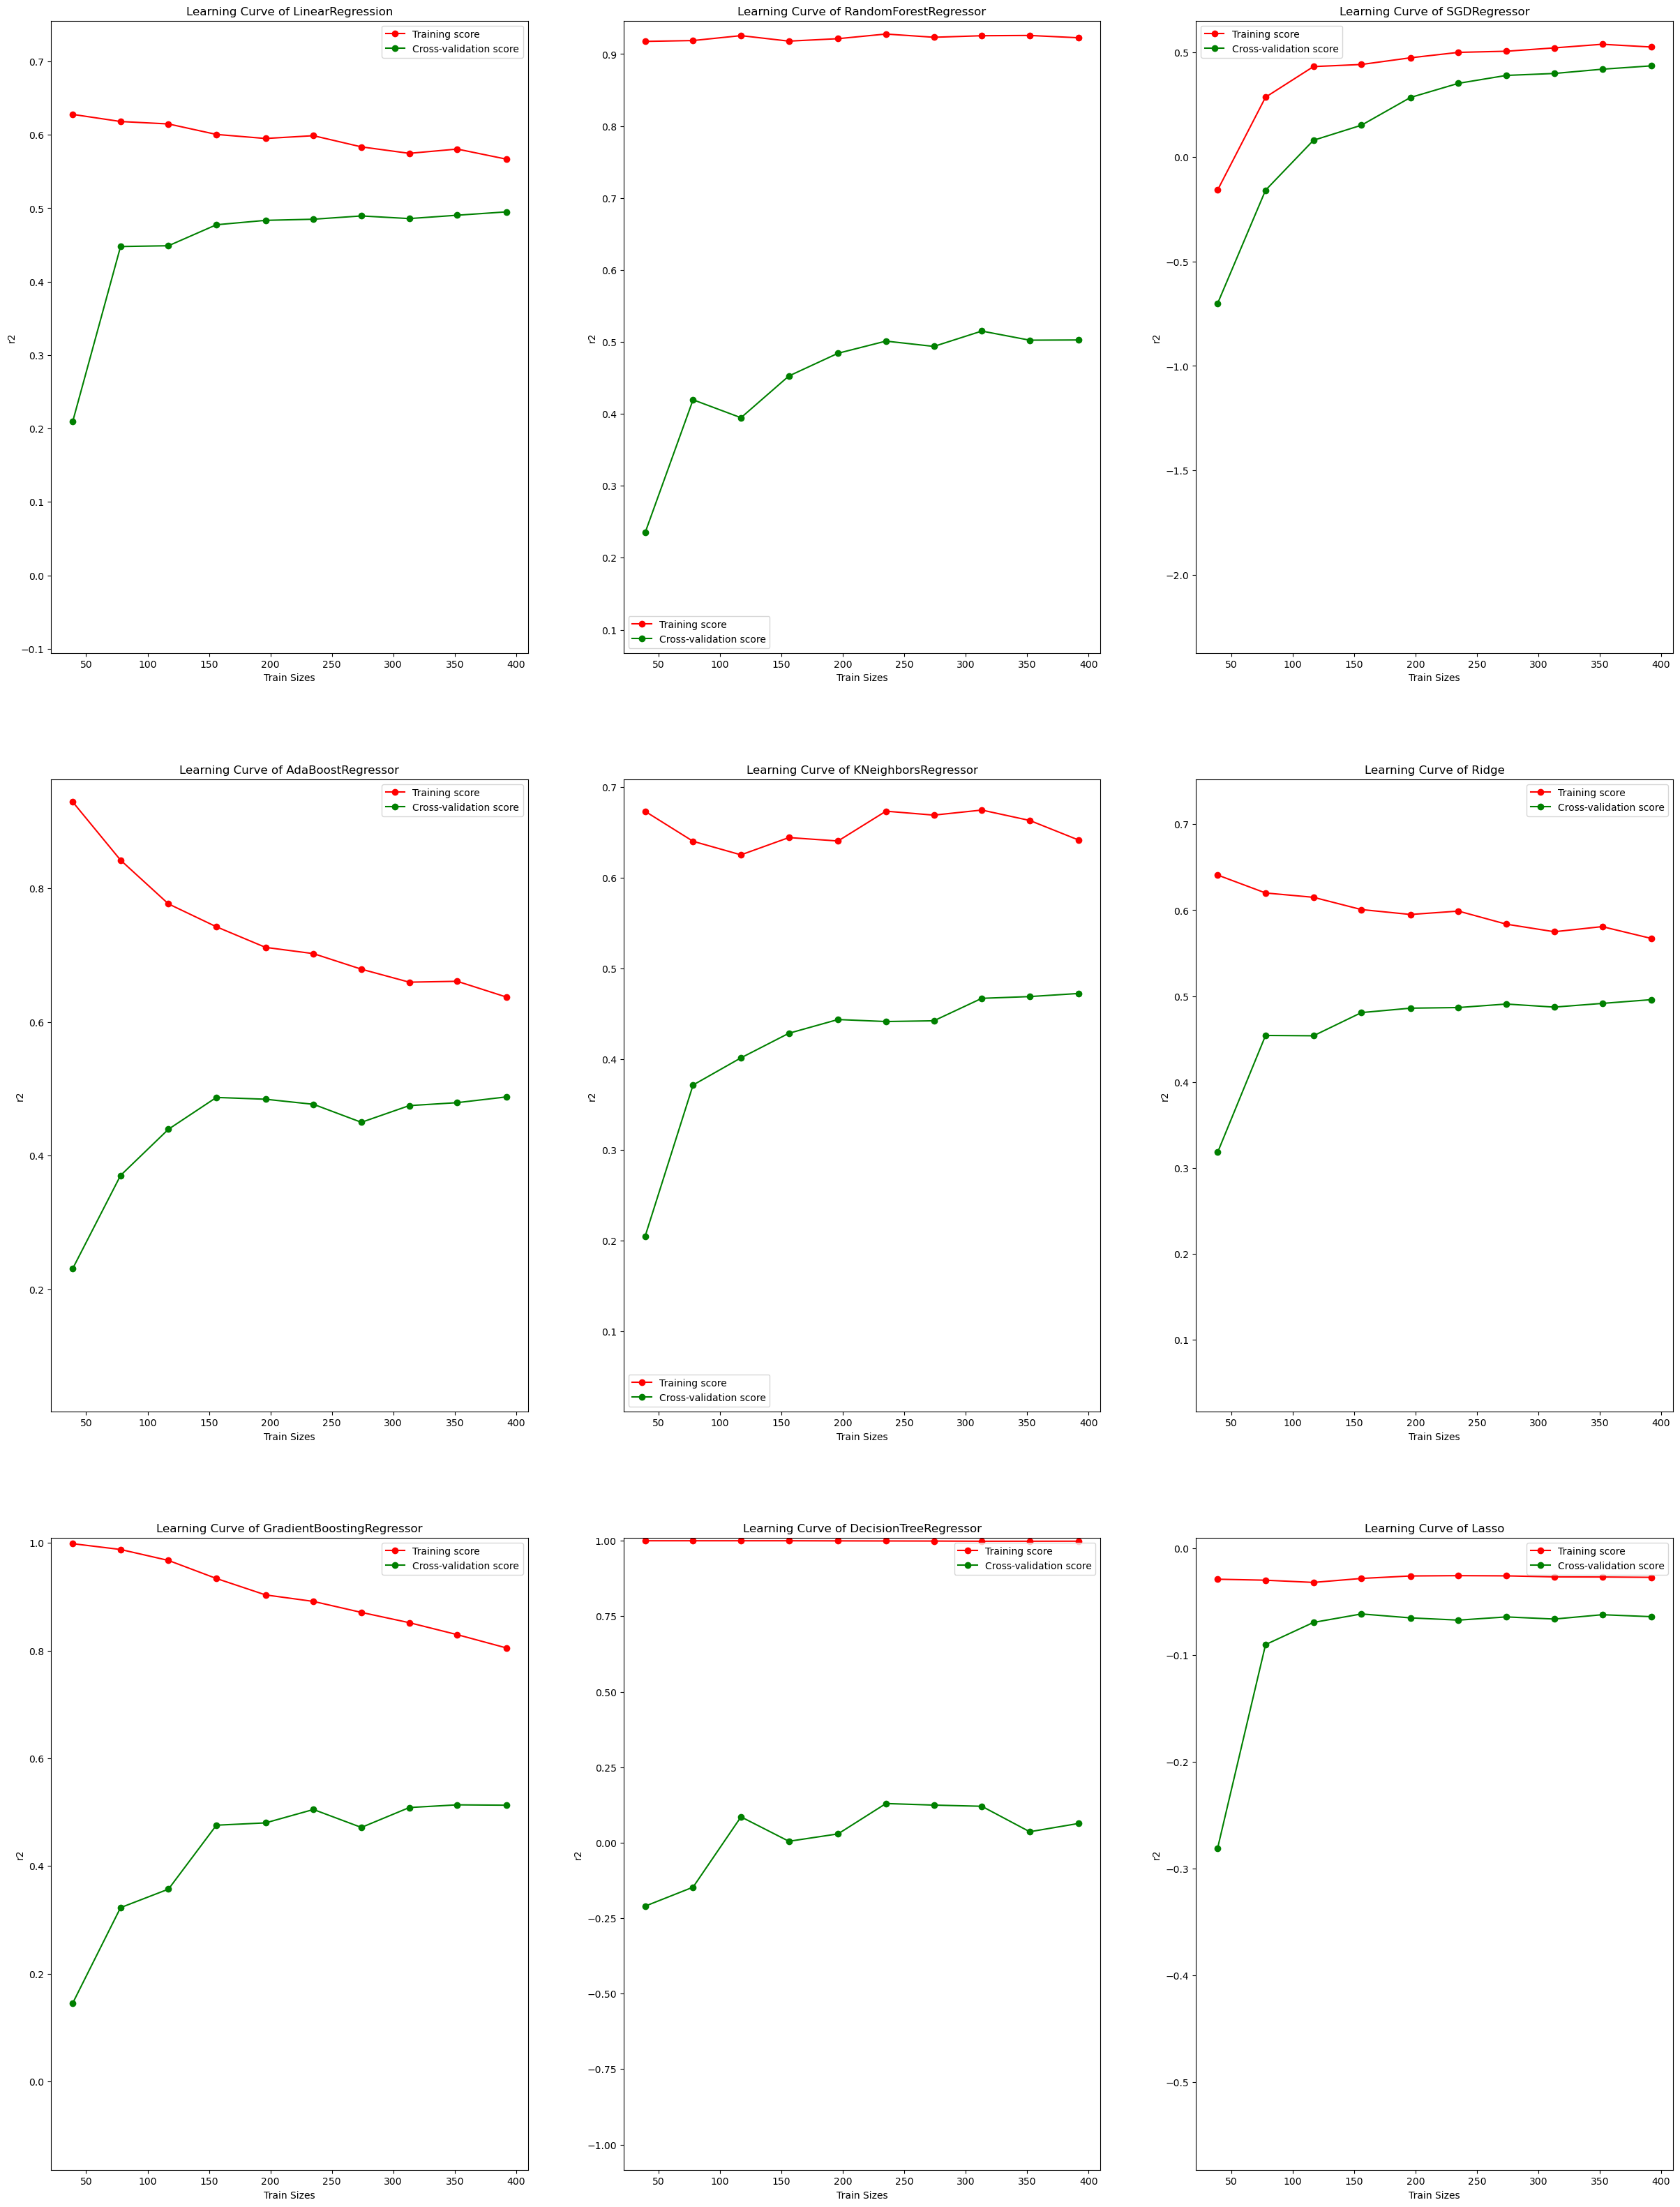

In [35]:
#Plot the graphs to show learning curves
fig, ax = plt.subplots(3,3, figsize=(30, 40))

output = []
for name, model in models:
    steps[-1] = (
        name, TransformedTargetRegressor(
            regressor=model, func=np.log1p, inverse_func=np.expm1
        )
    )
    temp_pipeline = Pipeline(steps=steps)
    if ax is not None:
        plot_learning_curve(
            temp_pipeline, X_train, y_train, scoring="r2", cv=10,
            ax=ax[models.index((name, model)) % 3, models.index((name, model)) // 3])
    # Cross validate
    score = cross_validate(
    temp_pipeline, X_train, y_train, scoring=score_metrics, n_jobs=3,
    verbose=1, cv=10, return_train_score=True)
    # Average score
    output.append(pd.Series(score, name=name).apply(np.mean))
plt.show()

<b>Observations:</b><br>
    - Generally, as more data is fitted on to the models, their cross-validation scores increased. <br>
    - Negative scores for Lasso show that the data is not suitable for the model as it shrinks the less important features coeffiecient to 0, which will remove these features.<br>
    - Decision Tree training score has a constant value of 1.00 which shows that the data has been overfitted to the model

### <u>Initialise Best Scoring Models</u>
- GradientBoostingRegressor, RandomForestRegressor & Ridge have a better r2 score and root mean square error than the other models
- Look at the scores for each fold

In [36]:
# Gradient Boosting Regressor
steps[model_step] = ("model", TransformedTargetRegressor(
regressor = GradientBoostingRegressor(random_state=42), func=np.log1p, inverse_func=np.expm1))
gradientBoost_reg = Pipeline(steps=steps)
gradientBoost_reg.fit(X_train, y_train)
scores = cross_validate(
    gradientBoost_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29388\511432.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.070070,0.005512,0.423806,-115052.424996,-86564.320619,-0.236432,-1.323706e+10
1,0.059667,0.005025,0.589250,-131930.710145,-94606.164468,-0.169885,-1.740571e+10
2,0.059668,0.006506,0.664251,-116602.785356,-82166.223471,-0.158355,-1.359621e+10
3,0.062195,0.006002,0.518747,-89772.525192,-69241.429066,-0.160474,-8.059106e+09
4,0.062826,0.005144,0.468052,-89652.239454,-71069.218345,-0.176144,-8.037524e+09
5,0.057569,0.004530,0.465771,-93238.489139,-70095.731570,-0.160535,-8.693416e+09
6,0.058567,0.005505,0.605473,-124200.297882,-86623.203925,-0.185952,-1.542571e+10
7,0.059312,0.004997,0.490545,-131712.264336,-94942.665032,-0.195223,-1.734812e+10
8,0.059312,0.004997,0.531657,-141235.558945,-99231.689441,-0.209607,-1.994748e+10
9,0.058300,0.005996,0.422252,-121580.515200,-86902.065355,-0.183957,-1.478182e+10


In [37]:
# Random Forest Regressor
steps[model_step] = ("model",  TransformedTargetRegressor(
regressor = RandomForestRegressor(random_state=42), func=np.log1p, inverse_func=np.expm1))
randomForest_reg = Pipeline(steps=steps)
randomForest_reg.fit(X_train, y_train)
scores = cross_validate(
    randomForest_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29388\355395179.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.151758,0.008024,0.503407,-106809.866291,-80855.321622,-0.232522,-1.140835e+10
1,0.184935,0.008510,0.526281,-141682.922473,-97621.164307,-0.174541,-2.007405e+10
2,0.151248,0.008533,0.658467,-117602.830970,-80326.271690,-0.150675,-1.383043e+10
3,0.161278,0.007510,0.402807,-100003.249854,-77579.394631,-0.185419,-1.000065e+10
4,0.164276,0.008533,0.430991,-92722.785247,-76057.412774,-0.194788,-8.597515e+09
5,0.157254,0.008021,0.562644,-84362.383972,-68984.079799,-0.164172,-7.117012e+09
6,0.160276,0.008533,0.570100,-129648.642753,-88537.763743,-0.183895,-1.680877e+10
7,0.177951,0.009505,0.478317,-133283.554794,-97468.862435,-0.202818,-1.776451e+10
8,0.189460,0.014101,0.447494,-153401.798444,-104817.801224,-0.219671,-2.353211e+10
9,0.178936,0.008507,0.419700,-121848.720985,-88085.707842,-0.187848,-1.484711e+10


In [38]:
# Ridge
steps[model_step] = ("model",  TransformedTargetRegressor(
regressor = Ridge(random_state=42), func=np.log1p, inverse_func=np.expm1))
ridge_reg = Pipeline(steps=steps)
ridge_reg.fit(X_train, y_train)
scores = cross_validate(
    ridge_reg,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29388\2687136139.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.015180,0.005012,0.410877,-116335.992263,-85957.844072,-0.233546,-1.353406e+10
1,0.014180,0.005012,0.532784,-140707.015629,-99967.170071,-0.170806,-1.979846e+10
2,0.015180,0.005012,0.580801,-130290.033457,-92883.528947,-0.177720,-1.697549e+10
3,0.016180,0.005012,0.497311,-91750.089056,-72761.224622,-0.168841,-8.418079e+09
4,0.014278,0.004999,0.406303,-94712.905561,-74936.034663,-0.186062,-8.970534e+09
5,0.012270,0.005109,0.528510,-87592.676259,-66588.063556,-0.150053,-7.672477e+09
6,0.011034,0.007111,0.494637,-140567.784758,-95432.058328,-0.192763,-1.975930e+10
7,0.011112,0.004999,0.520634,-127763.550703,-92347.566434,-0.189945,-1.632352e+10
8,0.012111,0.004516,0.670122,-118532.772693,-90257.417475,-0.202121,-1.405002e+10
9,0.011513,0.005004,0.317173,-132175.309443,-90369.406922,-0.182766,-1.747031e+10


## <u>Comparing models with baseline</u>
We will use the following:
1. Prediction Error Plot
2. Residual Plot

###  Prediction Error Plot
- Determine the performance of training data for each regressor based on the best-fit line plotted with the data points

In [39]:
#Building function to build a prediction error plot
def plot_predictionErrorPlot(model, X, y, ax=None):
    #Store the model name
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(y, y_pred, marker="x")
    l1=max(max(y_pred), max(y_test))
    l2=min(min(y_pred), min(y_test))
    ax.plot([l1, l2], [l1, l2], "r--", label="Identity")
    a, b = np.polyfit(y, y_pred, 1)
    ax.plot(y, a * y + b, "g-", label="Best Fit")
    ax.legend()
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(f"Prediction Error Plot: {model_name}")
    print(f"{model_name}'s R2: {r2_score(y,y_pred)}")
    return ax

DummyRegressor's R2: -0.027103635063244536
GradientBoostingRegressor's R2: 0.7916794523111546
RandomForestRegressor's R2: 0.9223118072131447
Ridge's R2: 0.566227486103545


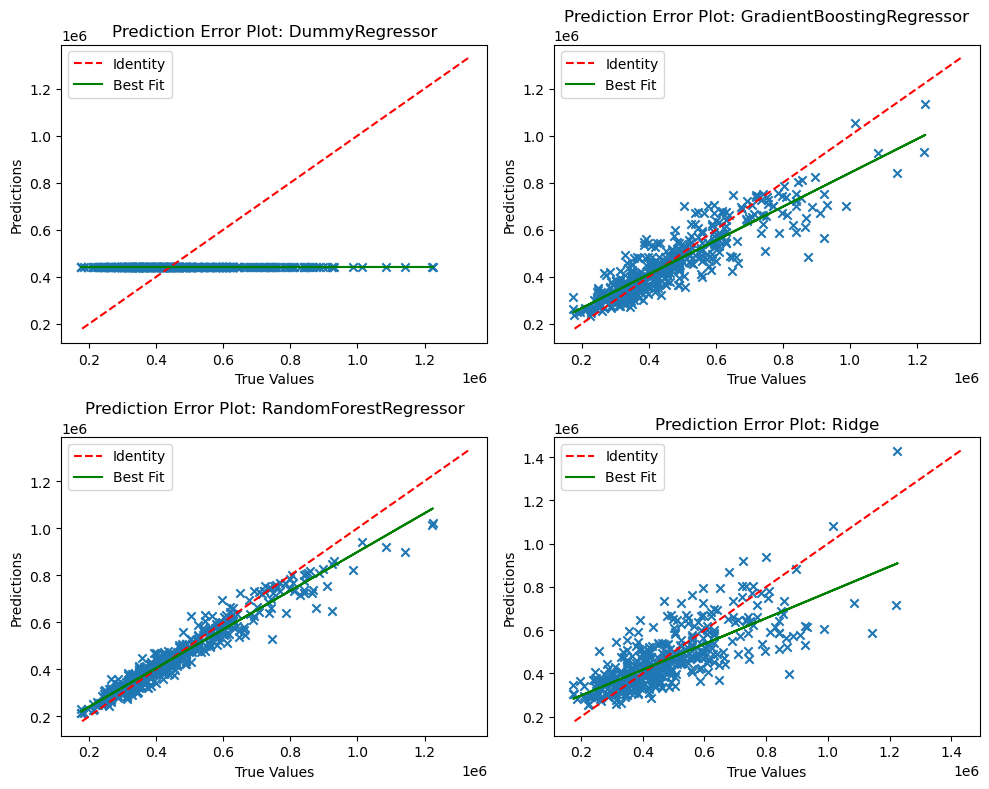

In [40]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
plot_predictionErrorPlot(dummy, X_train, y_train, ax1)
plot_predictionErrorPlot(gradientBoost_reg, X_train, y_train, ax2)
plot_predictionErrorPlot(randomForest_reg, X_train, y_train, ax3)
plot_predictionErrorPlot(ridge_reg, X_train, y_train, ax4)
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - DummyRegressor Best Fit line is completely off the Identity line, with the R2 score as -0.03 so the model does not follow the trend of the housing prices in US.<br>
    - GradientBoostingRegressor, RandomForestRegressor Best Fit line is slightly below the Identity line which shows that the model follows the trend of the housing prices in US at a strong positive linear rate.<br>
    - Further supported by the R2 score of 0.84 and 0.93 respectively <br>
    - Ridge best fit line is slightly below the Identity line which suggests that the housing prices in US is increasing at a moderate positive rate.

###  Residual Plot
- Shows the difference between predicted and actual data points

In [41]:
def plot_residual_plot(model, X, y, ax=None):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 15))
    residual = y - y_pred
    ax.scatter(range(len(residual)), residual, alpha=0.3)
    ax.set_xlabel("Data Point")
    ax.set_ylabel("Residual")
    ax.set_title(f"Residual Plot: {model_name}")
    return ax

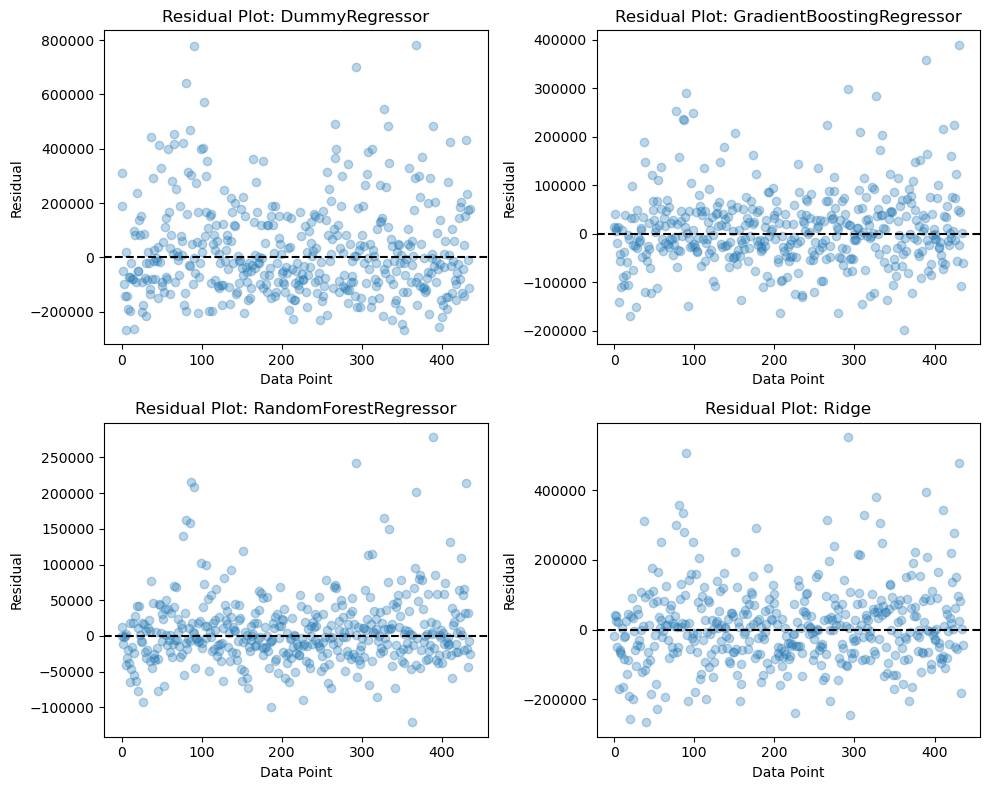

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
plot_residual_plot(dummy,X_train,y_train,ax=ax1)
plot_residual_plot(gradientBoost_reg,X_train,y_train,ax=ax2)
plot_residual_plot(randomForest_reg,X_train,y_train,ax=ax3)
plot_residual_plot(ridge_reg,X_train,y_train,ax=ax4)
ax1.axhline(y=0, linestyle="--", color='black')
ax2.axhline(y=0, linestyle="--", color='black')
ax3.axhline(y=0, linestyle="--", color='black')
ax4.axhline(y=0, linestyle="--", color='black')
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
- Data points seem to be very spread out in DummyRegressor and not clustered around y=0 which is way weaker than
- The other 3 models, which show that there are more data points clustered around y=0 but it is not that obvious
- Weak cluster around y=0 shows that the models only follow the data moderately

# 5) Model Improvement

### <u>Hyperparameter Tuning (GridSearchCV)</u>
Run through the parameters to see which parameters give the best r2 score

Parameters to be tuned (GradientBoostingRegressor):
1. max_depth - maximum depth of the tree
2. max_leaf_nodes - maximum number of leaves nodes
3. n_estimators - numbers of trees in the forest
4. criterion - measure the quality of a split {"friedman_mse",'squared_error'}

Parameters to be tuned (RandomForestRegressor):
1. max_depth - maximum depth of the tree
2. max_leaf_nodes - maximum number of leaves nodes
3. n_estimators - numbers of trees in the forest
4. criterion - measure the quality of a split {"friedman_mse",'squared_error'}

Parameters to be tuned (Ridge):
1. alpha - controls the amount of regularization applied to the model (Adds a penalty term to the loss function, which is proportional to the sum of the squared coefficients multiplied by the alpha parameter)
-  As alpha value increase, regularization increases, helps to reduce overfitting and can improve generalization on unseen data
-  As alpha value decrease, regularization decreases, allowing model to fit the training data more closely, potentially increasing the risk of overfitting.
2. solver - Solver used in computation {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}

#### Why GridSearchCV and not RandomizedSearchCV?
- GridSearchCV exhaustively considers all hyperparameter combination but
- RandomizedSearchCV  can sample a given number of candidates from a hyperparameter space with a specified distribution.

#### Gradient Boosting Regressor

In [43]:
list(GradientBoostingRegressor().get_params().keys())

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [44]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100],
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": np.arange(50,201,50),
    "criterion": ["friedman_mse",'squared_error']  
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=1, random_state=42),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    )
)

gradientBoost_search = Pipeline(steps=steps)
# Fitting Model
gradientBoost_search.fit(X_train, y_train)

print(gradientBoost_search.named_steps["hyper"].best_estimator_)
print(gradientBoost_search.named_steps["hyper"].best_params_)
print(gradientBoost_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 528 candidates, totalling 5280 fits
GradientBoostingRegressor(criterion='squared_error', max_depth=10,
                          max_leaf_nodes=11, n_estimators=50, random_state=42)
{'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 11, 'n_estimators': 50}
0.5225239656215319


#### Random Forest Regressor

In [45]:
list(RandomForestRegressor().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [46]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100], 
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": np.arange(50,501,50),
    "criterion": ["friedman_mse",'squared_error']
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        RandomForestRegressor(
            min_samples_split=2, min_samples_leaf=1, random_state=42
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    ),
)

random_forest_search = Pipeline(steps=steps)
# Fitting Model
random_forest_search.fit(X_train, y_train)
print(random_forest_search.named_steps["hyper"].best_estimator_)
print(random_forest_search.named_steps["hyper"].best_params_)
print(random_forest_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 1320 candidates, totalling 13200 fits
RandomForestRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=15,
                      n_estimators=150, random_state=42)
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 15, 'n_estimators': 150}
0.5154779552270574


#### Ridge

In [47]:
list(Ridge().get_params().keys())

['alpha',
 'copy_X',
 'fit_intercept',
 'max_iter',
 'positive',
 'random_state',
 'solver',
 'tol']

In [48]:
import warnings
warnings.filterwarnings('ignore')

# Create the parameter grid
params_grid = {
    "alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    "max_iter": np.arange(1000, 10001, 1000)
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        Ridge(
            random_state=42
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="r2"
    ),
)

ridge_search = Pipeline(steps=steps)
# Fitting Model
ridge_search.fit(X_train, y_train)
print(ridge_search.named_steps["hyper"].best_estimator_)
print(ridge_search.named_steps["hyper"].best_params_)
print(ridge_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Ridge(alpha=1, max_iter=1000, random_state=42, solver='saga')
{'alpha': 1, 'max_iter': 1000, 'solver': 'saga'}
0.500480463385858


## Model Evaluation
- We will have to evaluate the model now again after hyperparameter tuning

### Initialize Model After Tuning
- Models are initiated again after tuning

#### Gradient Boosting Regressor

In [49]:
# Gradient Boosting Regressor
steps[model_step] = (
    "model",
    gradientBoost_search.named_steps["hyper"].best_estimator_,
)

tuned_gradientBoost_reg = Pipeline(steps=steps)
# Fitting Model
tuned_gradientBoost_reg.fit(X_train, y_train)
# Predictions
gradientBoosting_pred = tuned_gradientBoost_reg.predict(X_test)

#### Random Forest Regressor

In [50]:
# Random Forest Regressor
steps[model_step] = (
    "model",
    random_forest_search.named_steps["hyper"].best_estimator_,
)

tuned_random_forest_reg = Pipeline(steps=steps)
# Fitting Model
tuned_random_forest_reg.fit(X_train, y_train)
# Predictions
random_forest_pred = tuned_random_forest_reg.predict(X_test)

#### Ridge

In [51]:
# Ridge
steps[model_step] = (
    "model",
    ridge_search.named_steps["hyper"].best_estimator_,
)

tuned_ridge_reg = Pipeline(steps=steps)
# Fitting Model
tuned_ridge_reg.fit(X_train, y_train)
# Predictions
ridge_predict = tuned_ridge_reg.predict(X_test)

## <u>Comparing Final Models</u>
Comparing tuned and untuned models with test data using:
-  Prediction Error Plot
-  Residual Plot 

Untuned Models
GradientBoostingRegressor's R2: 0.45742997984449085
RandomForestRegressor's R2: 0.4737660378016373
Ridge's R2: 0.5077743849097736

Tuned Models
GradientBoostingRegressor's R2: 0.47286321116846164
RandomForestRegressor's R2: 0.47248472387489726
Ridge's R2: 0.5280843173397289


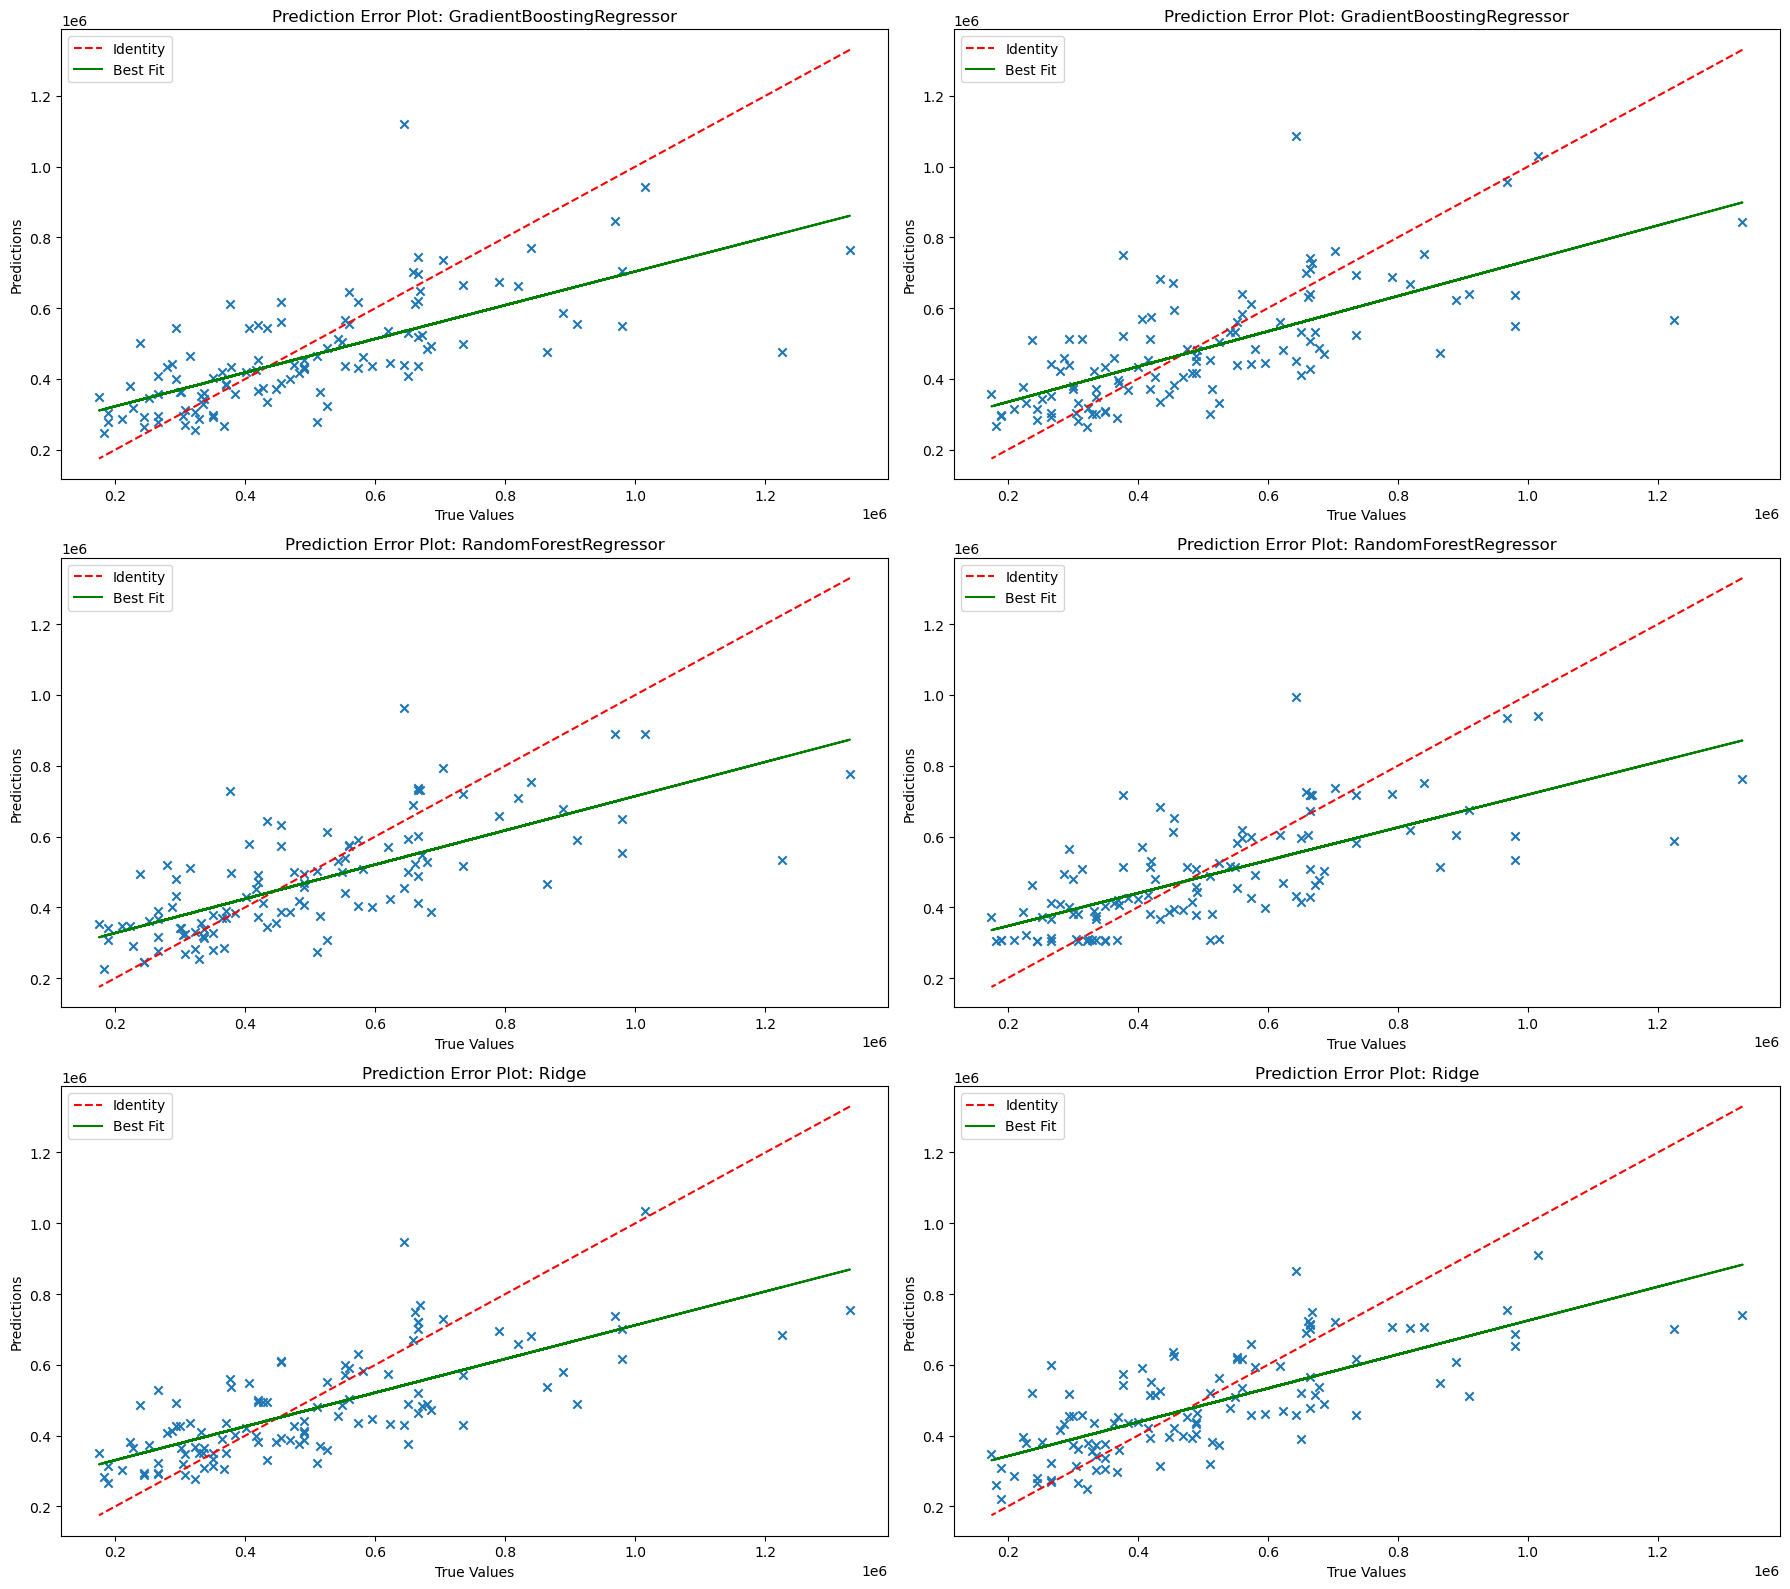

In [52]:
#Prediction Error Plot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize= (18, 16))

#Untuned
print("Untuned Models")
plot_predictionErrorPlot(gradientBoost_reg, X_test, y_test, ax1)
plot_predictionErrorPlot(randomForest_reg, X_test, y_test, ax3)
plot_predictionErrorPlot(ridge_reg, X_test, y_test, ax5)
print()

#Tuned
print("Tuned Models")
plot_predictionErrorPlot(tuned_gradientBoost_reg, X_test, y_test, ax2)
plot_predictionErrorPlot(tuned_random_forest_reg, X_test, y_test, ax4)
plot_predictionErrorPlot(tuned_ridge_reg, X_test, y_test, ax6)

plt.tight_layout()
plt.show()

<b>Observations:</b><br>
- Generally, the best fit line is placed slightly below the Identity line, hence shows a moderate positive linear relationship.
- Based on the test data r2 score, tuned models all performed better than the untuned models from what I have selected.
- Looking at only test data r2 score, the best model is Ridge.

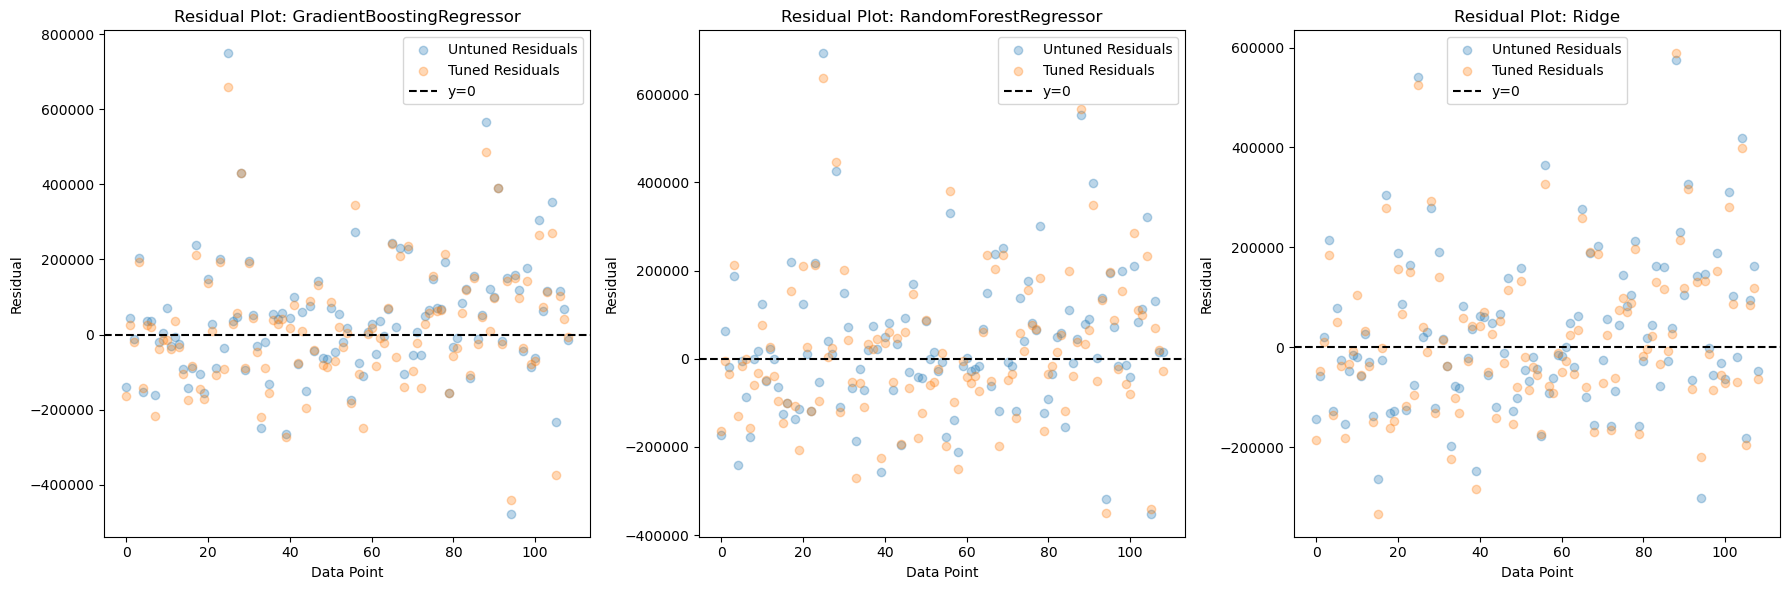

In [53]:
#Residual Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
plot_residual_plot(gradientBoost_reg, X_test, y_test,ax=ax1)
plot_residual_plot(tuned_gradientBoost_reg, X_test, y_test,ax=ax1)
plot_residual_plot(randomForest_reg, X_test, y_test,ax=ax2)
plot_residual_plot(tuned_random_forest_reg, X_test, y_test,ax=ax2)
plot_residual_plot(ridge_reg, X_test, y_test,ax=ax3)
plot_residual_plot(tuned_ridge_reg, X_test, y_test,ax=ax3)
ax1.axhline(y=0, linestyle="--", color='black')
ax2.axhline(y=0, linestyle="--", color='black')
ax3.axhline(y=0, linestyle="--", color='black')

ax1.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
ax2.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
ax3.legend(["Untuned Residuals", "Tuned Residuals", "y=0"],loc="best")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
- Based on outliers alone, Ridge does not have outliers that exceed 600000 whereas Random Forest and Gradient Boosting have outliers that exceed 600000.
- This implies that the actual and predicted values for Ridge do not have such a big difference compared to the other 2 models which shows that Ridge is the best model.

In [54]:
#Show the RMSE & R2 values of test data

pd.DataFrame([[
    mean_squared_error(y_test, gradientBoosting_pred, squared=False),
    mean_squared_error(y_test, random_forest_pred, squared=False),
    mean_squared_error(y_test, ridge_predict, squared=False)],
    [r2_score(y_test, gradientBoosting_pred),
     r2_score(y_test, random_forest_pred),
     r2_score(y_test, ridge_predict)]],
    columns=["GradientBoostingRegressor", "RandomForestRegressor", "Ridge"],
    index=["Root Mean Squared Error","R2"],
)

,GradientBoostingRegressor,RandomForestRegressor,Ridge
Root Mean Squared Error,163231.428609,163290.018654,154445.167240
R2,0.472863,0.472485,0.528084


<b>Observations:</b><br>
- Based on the root mean squared error, Ridge has the lowest value which implies smaller prediction errors and better performance of the model in capturing the variability of the data.
- Based on the R2 value, Ridge has the best r2 values which implies that it has the best performance 

### Feature Importance
- Find out which features tuned Ridge considers important (Best Model)

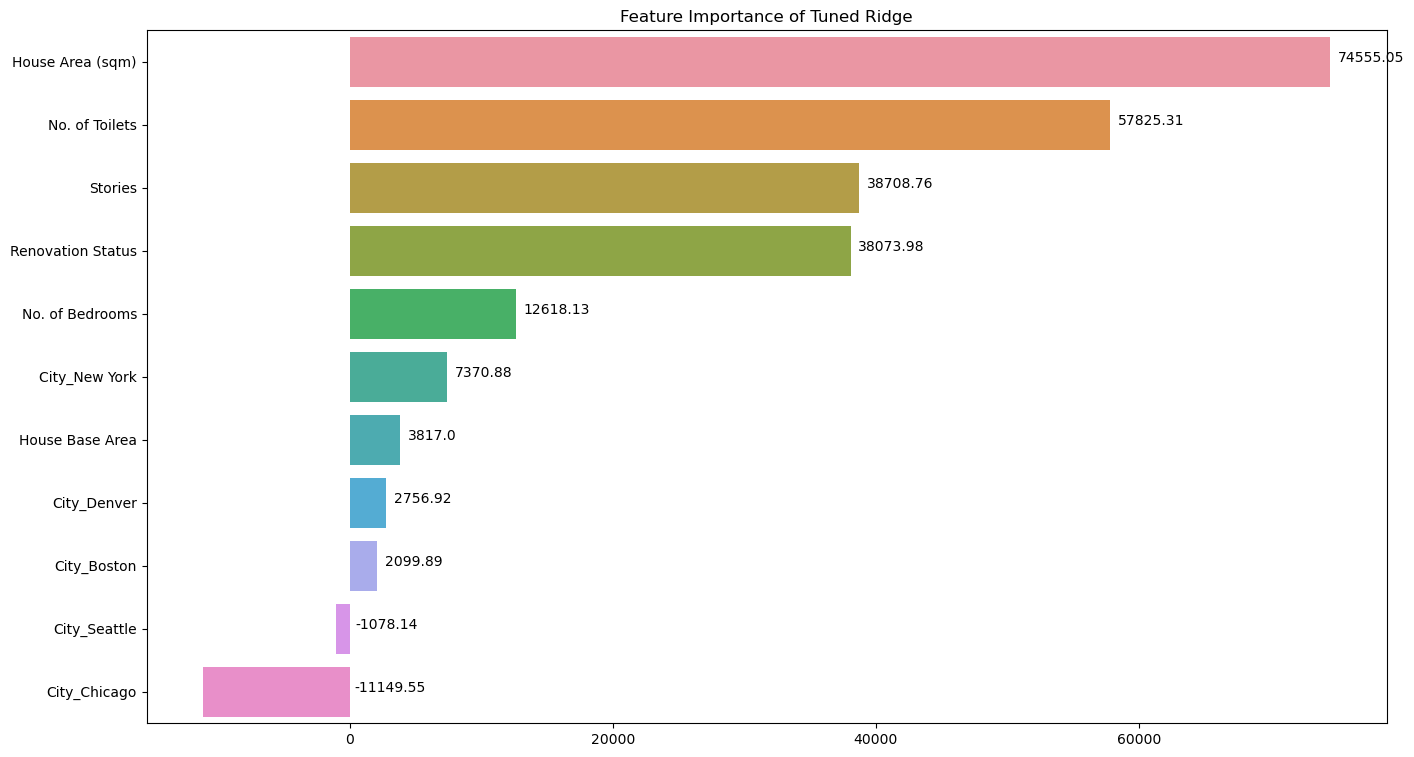

In [55]:
feature_names=["City_Boston","City_Chicago","City_Denver","City_New York","City_Seattle","Renovation Status",'House Area (sqm)', 'No. of Bedrooms','No. of Toilets','Stories','House Base Area']

#Create feature importance and sort the features based on the coefficient
importance = pd.Series(
tuned_ridge_reg.named_steps["model"].coef_, index=feature_names
).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=importance.values, y=importance.index, ax=ax
)
ax.set_title("Feature Importance of Tuned {}".format("Ridge"))
for i, v in zip(np.arange(0, len(importance)), importance.values):
    if v >=0:
        ax.text(x=v+600, y=i, s=round(v, 2))
    elif v>= -1500 and v<0:
        ax.text(x=v+1500, y=i, s=round(v, 2))
    elif v<= -12000:
        ax.text(x=v+38200, y=i, s=round(v, 2))
    else:
        ax.text(x=v+11500, y=i, s=round(v, 2))
plt.show()

<b>Observations:</b><br>
- Top 3 features the Ridge has considered most important are House Area (sqm), No. of Toilets and Stories
- City the model considers most important is New York

### <u>Saving Models</u>

In [56]:
pickle.dump(tuned_ridge_reg, open("RidgeRegressor.p", "wb"))

# 6) Summary
Ridge is the best model based on the r2 score of the current data we have now. Due to the lack of data, the r2 score of all models used to predict the price of the houses in US are all quite moderate. The data only has 545 rows which shows there is not enough data for the price to represent those cities of the US. For the model to fully predict the price of the houses in US, there must be more data collected on the houses in each city of US.